In [26]:
import os
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
# 数据所在文件夹
base_dir = './data/ECG_image'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# 训练集
train_noisy_dir = os.path.join(train_dir, '~')
train_normal_dir = os.path.join(train_dir, 'N')
train_other_dir = os.path.join(train_dir, 'O')
train_af_dir = os.path.join(train_dir, 'A')

# 验证集
validation_noisy_dir = os.path.join(validation_dir, '~')
validation_normal_dir = os.path.join(validation_dir, 'N')
validation_other_dir = os.path.join(validation_dir, 'O')
validation_af_dir = os.path.join(validation_dir, 'A')

In [28]:
model = tf.keras.models.Sequential([
    #如果训练慢，可以把数据设置的更小一些
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    #为全连接层准备
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),

    tf.keras.layers.Dense(4)
#     tf.keras.layers.Dense(5, activation='softmax')
])

In [29]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)             

In [30]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=1e-4),
              metrics=['acc'])

In [31]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [34]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(64, 64),  # 指定resize成的大小
        batch_size=20,
        # 如果one-hot就是categorical，二分类用binary就可以
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(64, 64),
        batch_size=20,
        class_mode='categorical')

Found 3184 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [35]:
class_names = train_generator.class_names
print(class_names)

AttributeError: 'DirectoryIterator' object has no attribute 'class_names'

In [21]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=20,
      validation_data=validation_generator,
      validation_steps=10,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/20
100/100 - 4s - loss: 0.5384 - acc: 0.7725 - val_loss: 0.7955 - val_acc: 0.5833
Epoch 2/20
100/100 - 2s - loss: 0.5441 - acc: 0.7715
Epoch 3/20
100/100 - 3s - loss: 0.5369 - acc: 0.7712
Epoch 4/20
100/100 - 2s - loss: 0.5202 - acc: 0.7710
Epoch 5/20
100/100 - 2s - loss: 0.4887 - acc: 0.7770
Epoch 6/20
100/100 - 2s - loss: 0.4751 - acc: 0.7777
Epoch 7/20
100/100 - 3s - loss: 0.4690 - acc: 0.7855
Epoch 8/20
100/100 - 2s - loss: 0.4749 - acc: 0.7863
Epoch 9/20
100/100 - 2s - loss: 0.4551 - acc: 0.7893
Epoch 10/20
100/100 - 3s - loss: 0.4622 - acc: 0.7935
Epoch 11/20
100/100 - 2s - loss: 0.4588 - acc: 0.7795
Epoch 12/20
100/100 - 2s - loss: 0.4378 - acc: 0.8075
Epoch 13/20
100/100 - 2s - loss: 0.4428 - acc: 0.8009
Epoch 14/20
100/100 - 3s - loss: 0.4258 - acc: 0.8035
Epoch 15/20
100/100 - 2s - loss: 0.4510 - acc: 0.7928
Epoch 16/20
100/100 - 2s - loss: 0.4347 - acc: 0.8140
Epoch 17/20
100/100 - 2s - loss: 0.4368 - acc: 0.8080
Epoch 18/20
100/100 - 3s - loss: 0.4320 - acc: 0.8075


ValueError: x and y must have same first dimension, but have shapes (20,) and (1,)

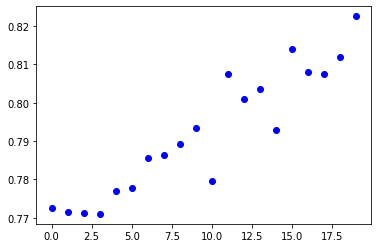

In [22]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()